In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
x = data.iloc[:,2:4].values
y = data.iloc[:,-1].values

In [6]:
x[0]

array([   19, 19000], dtype=int64)

In [7]:
y[0]

0

In [8]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = scale.fit_transform(x)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
x[0:10]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)

In [12]:
clf = SVC(kernel = 'linear', random_state =0)
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
Y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(Y_test,Y_pred)

0.8333333333333334

In [16]:
from matplotlib._cm_listed import ListedColormap

In [17]:
X_set, Y_set = X_train, Y_train

# Step inside range function
h = 0.01
X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, X_set[:,0].max() + 1, h),
                    np.arange(X_set[:,1].min() - 1, X_set[:,-1].max() + 1, h))

In [18]:
Z = clf.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape)

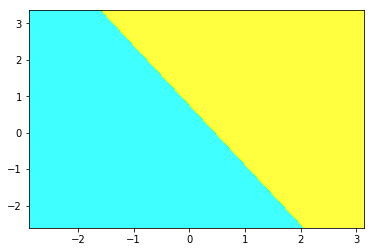

In [19]:
plt.contourf(X1, X2, Z, alpha =0.75, cmap = ListedColormap(('cyan','yellow')))

In [20]:
clf.coef_

array([[1.58132094, 0.96650842]])

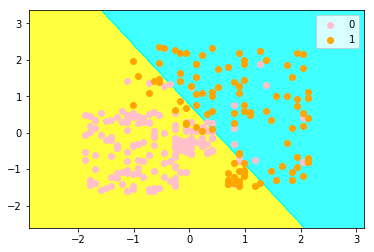

In [22]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.contourf(X1,X2,Z, alpha =0.75, cmap = ListedColormap(('yellow','cyan')))

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
               c = ListedColormap(('pink','orange'))(i), label = j)
plt.legend()